# Política monetaria

In [2]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime
import os
import requests
from nltk.corpus import stopwords


In [3]:
url_main = ("https://www.banxico.org.mx")
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

In [4]:
with HTMLSession() as sess:
    r = sess.get(url)

In [5]:
comunicados = r.html.find("tr")
len(comunicados)

184

In [6]:
#crear listado de comunicados disponibles en la página
comunicados_Db = []
for idx_com in range(184):
    fecha = r.html.find("td[class='bmdateview']")[idx_com].text
    fecha = pd.to_datetime(fecha, format='%d/%m/%y')
    titulo_c = r.html.find("td[class='bmtextview']")[idx_com]
    titulo,*_ = re.findall(".*(?=\nTexto)",titulo_c.text)
    liga,*_ = r.html.find("td[class='bmtextview']")[idx_com].absolute_links
    comunicados_Db.append([fecha, titulo,liga])

In [7]:
#crear DF con los datos obtenidos y filtrar los anteriores a la fecha indicada
df = pd.DataFrame(comunicados_Db,columns=["date","text","url"]).set_index("date")
df = df.loc[df.index > pd.Timestamp(2008,2,15)]
print(f'comunidados disponibles: {df.shape[0]}')


comunidados disponibles: 105


In [8]:
#poner en una diferente columna la clase
df["category"] = df.text.str.extract("(disminuye|incrementa|sin cambio|aumenta|reduce)")

In [9]:
df.head()

,text,url,category
date,,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye


In [ ]:
#estraer todos los pdf en una carpeta
for pdf in range(df.index.shape[0]):
    r2 = requests.get(df.url[pdf])
    paper = r2.content
    carpeta = "descargas_pdf"
    arch = "comunicado_" + df.index[pdf].strftime('%m%d%y') + ".pdf"
    os.path.join(carpeta,arch)
    if not os.path.exists("descargas_pdf"):
        os.mkdir(carpeta)
        full_path = os.path.join(carpeta,arch)
        with open(full_path,"wb") as f:
            f.write(paper)
    else:
        full_path = os.path.join(carpeta,arch)
        with open(full_path,"wb") as f:
            f.write(paper)

In [10]:
#tamaño de las clases
df.groupby("category").size()

category
disminuye     16
incrementa    18
sin cambio    71
dtype: int64

In [11]:
def cat_num(arg):
    switcher = {
        "disminuye": -1,
        "incrementa": 1,
       "sin cambio": 0,
    }
    return switcher.get(arg)

df["cat_num"] = [cat_num(x) for x in df.category]

In [12]:
#enviar el data frame a un pkl para uso posterior
df.to_pickle("resumen_comunicados.pkl")

D:\Programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


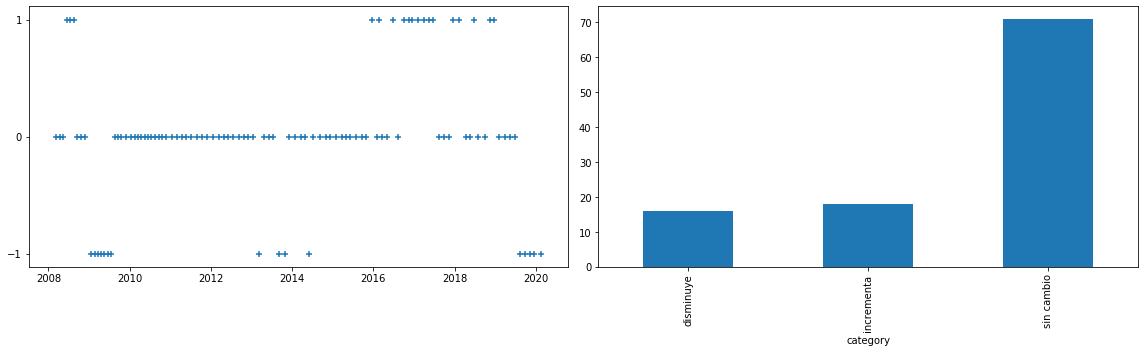

In [13]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16,5))
axs[0].scatter(x = df.index, y = df.cat_num,
               marker = "+")
axs[0].set_yticks([-1,0,1])
axs[1] = df["cat_num"].groupby(df.category).count().plot(kind="bar")
        
plt.show()

In [14]:
resumen = df.groupby(df.category).resample("Y").count()
resumen

text  url  category  cat_num
category   date                                    
disminuye  2009-12-31     7    7         7        7
           2010-12-31     0    0         0        0
           2011-12-31     0    0         0        0
           2012-12-31     0    0         0        0
           2013-12-31     3    3         3        3
           2014-12-31     1    1         1        1
           2015-12-31     0    0         0        0
           2016-12-31     0    0         0        0
           2017-12-31     0    0         0        0
           2018-12-31     0    0         0        0
           2019-12-31     4    4         4        4
           2020-12-31     1    1         1        1
incrementa 2008-12-31     3    3         3        3
           2009-12-31     0    0         0        0
           2010-12-31     0    0         0        0
           2011-12-31     0    0         0        0
           2012-12-31     0    0         0        0
           2013-12-31     0    0         0        0
           2014-12-31     0    0         0        0
           2015-12-31     1    1         1        1
           2016-12-31     5    5         5        5
           2017-12-31     5    5         5        5
           2018-12-31     4    4         4        4
sin cambio 2008-12-31     6    6         6        6
           2009-12-31     4    4         4        4
           2010-12-31    11   11        11       11
           2011-12-31     8    8         8        8
           2012-12-31     8    8         8        8
           2013-12-31     5    5         5        5
           2014-12-31     7    7         7        7
           2015-12-31     7    7         7        7
           2016-12-31     4    4         4        4
           2017-12-31     3    3         3        3
           2018-12-31     4    4         4        4
           2019-12-31     4    4         4        4